#Importamos las librerias que nos seran utiles

In [319]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

#Importamos los datos

In [320]:
sharks = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/attacks.csv', encoding="ISO-8859-1")

In [321]:
sdf = pd.DataFrame(sharks)

### AGREGAR UN MINI EDA PARA MOSTRAR QUE HAY POCOS DATOS NUMERICOS, ETC

##Creo un nuevo data frame eliminando las columnas que no son relevantes para el analisis de la primer hipotesis ###DEFINIR FUNCION 

In [322]:
sdf.drop(columns=['pdf', 'href formula', 'href', 'Unnamed: 22', 'Unnamed: 23', 'Name', 'Investigator or Source', 'Sex ', 'Age', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Activity', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'original order'], inplace=True)

#Las columnas 'Case Number', 'Case Number.1' y 'Case Number.2' son relevantes para el analisis, sin embargo, vamos a chequear en que medida los valores de las columnas se parecen para prescindir de alguna de las tres ##DEFINIR FUNCION

In [323]:
compare = np.where(sdf['Case Number.1'] == sdf['Case Number.2'], True, False)

In [324]:
sdf['equal'] = compare

In [325]:
sdf['equal'].value_counts() 

False    19441
True      6282
Name: equal, dtype: int64

In [326]:
sdf.isnull().sum()

Case Number      17021
Type             19425
Case Number.1    19421
Case Number.2    19421
equal                0
dtype: int64

##SI COMPARAMOS LAS TRES COL ENTRE SI, EN DONDE MENOS DIF DE VAL HAY ES ENTRE CAS NBR Y CAS NBR.2, AUNQUE LA DI ES MINIMA. SIN EMBARGO DE LAS TRES COL LA QUE MENOS CANT DE NULL TIENE ES CASE NBR, NOS QUEDAMOS CON ELLA##DEJAMOS SOLO LAS COLUMNAS CASE NR Y TYPE

In [327]:
sdf.drop(columns=['Case Number.1', 'Case Number.2', 'equal'], inplace=True)
sdf.head()

,Case Number,Type
0,2018.06.25,Boating
1,2018.06.18,Unprovoked
2,2018.06.09,Invalid
3,2018.06.08,Unprovoked
4,2018.06.04,Provoked


##VAMOS A ELIMINAR LOS VALORES QUE NO SEAN FECHA, YA QUE NOS INTERESA VER LA ESTACIONALIDAD. Empezamos por los valores NaN, y luego añadiremos una columna solo con los valores que contengan informacion sobre el mes, ya que nos interesa solo la indfo mensual

In [328]:
sdf.dropna(inplace=True)

In [387]:
def filtracion(x):
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    m = re.findall('\d{4}.\d{2}.\d{2}', x)
    if m and m[0][5:7] != '00':
        for k, v in months.items():
            if k == m[0][5:7]:
                return v

In [388]:
sdf['Month'] = sdf['Case Number'].apply(filtracion)

In [389]:
sdf.dropna(inplace=True)

In [398]:
ataques_mensuales = pd.DataFrame(sdf['Month'].value_counts())

In [399]:
c = {'Month': 'Monthly Attacks'}

In [400]:
ataques_mensuales = ataques_mensuales.rename(columns=c)

In [401]:
display(ataques_mensuales)

,Monthly Attacks
Jul,668
Aug,599
Sep,552
Jan,520
Jun,499
Apr,457
Dec,443
Oct,441
Mar,409
Nov,406


In [416]:
ataques_mensuales.describe()

,Monthly Attacks
count,12.000000
mean,480.583333
std,89.497037
min,382.000000
25%,408.250000
50%,450.000000
75%,528.000000
max,668.000000


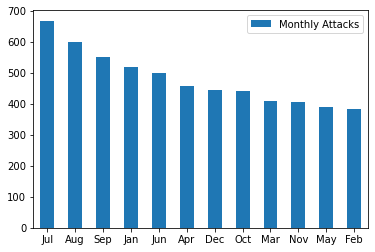

In [415]:
ax = ataques_mensuales.plot.bar(rot=0)

<AxesSubplot:xlabel='Monthly Attacks', ylabel='Count'>

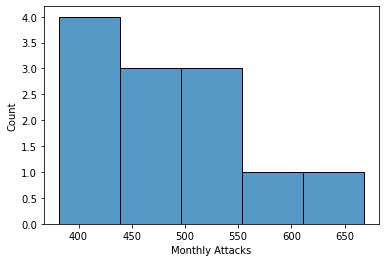

In [417]:
sns.histplot(x=ataques_mensuales['Monthly Attacks'])

<AxesSubplot:xlabel='Monthly Attacks'>

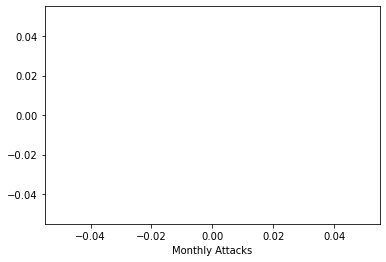

In [418]:
sns.scatterplot(x=ataques_mensuales['Monthly Attacks'], data=ataques_mensuales)